In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import pyfits as pf

In [2]:
data = pf.open('data/GOODS-N_SEDS1_sci_sub.fits')
data2 = pf.open('data/GOODS-N_acsz_sci_sub.fits')
cat = np.genfromtxt('data/goodsn_3dhst.v4.1.cat')

In [6]:
data2[0].data.shape

(20480L, 20480L)

<IPython.core.display.Javascript object>


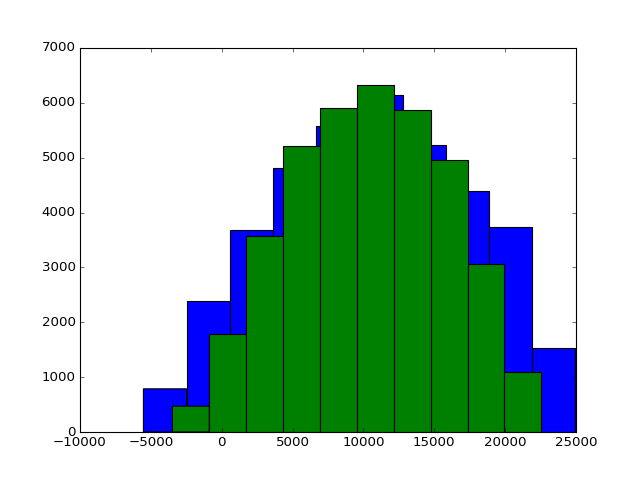

(array([  471.,  1786.,  3574.,  5222.,  5905.,  6329.,  5872.,  4965.,
         3057.,  1098.]),
 array([ -3479.07326432,   -875.67920073,   1727.71486287,   4331.10892646,
          6934.50299005,   9537.89705364,  12141.29111724,  14744.68518083,
         17348.07924442,  19951.47330801,  22554.86737161]),
 <a list of 10 Patch objects>)

In [46]:

plt.figure(5)
plt.hist(x)
plt.hist(y)

In [30]:
data2[0].header["CRPIX1"]
print cat[0][[3,4]]

[ 189.145197   62.094013]


<IPython.core.display.Javascript object>


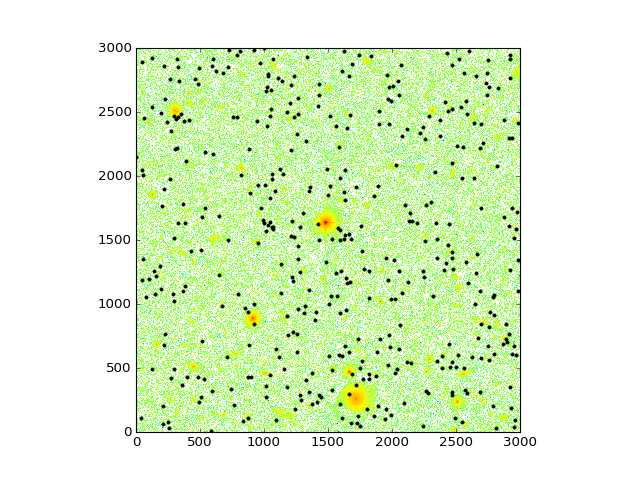

C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in log10


In [55]:
def from_cat_to_img(ra, dec, data):
    x_0 = data[0].header["CRPIX1"]
    ra_0 = data[0].header["CRVAL1"]
    dra_0 = data[0].header["CD1_1"]
    y_0 = data[0].header["CRPIX2"]
    dec_0 = data[0].header["CRVAL2"]
    ddec_0 = data[0].header["CD2_2"]
    ang = -data[0].header["ORIENTAT"]/180.*np.pi
    x =  (ra - ra_0)/dra_0
    y =  (dec - dec_0)/ddec_0
    x1 = x_0 + x*np.cos(ang)+y*np.sin(ang)
    y1 = y_0 + -x*np.sin(ang)+y*np.cos(ang)
    return x1, y1

filt = cat[:,45]>0.5
x,y = from_cat_to_img(cat[filt,3],cat[filt,4],data2)
plt.figure(1)
plt.imshow(np.log10(data2[0].data[7000:10000,7000:10000]).T, interpolation='nearest')
plt.plot(x-7000,y-7000, '.k')
plt.xlim([0,3000])
plt.ylim([0,3000])
lt.show()

[array(12683.163536471584), array(1568.450502390071)]


<IPython.core.display.Javascript object>


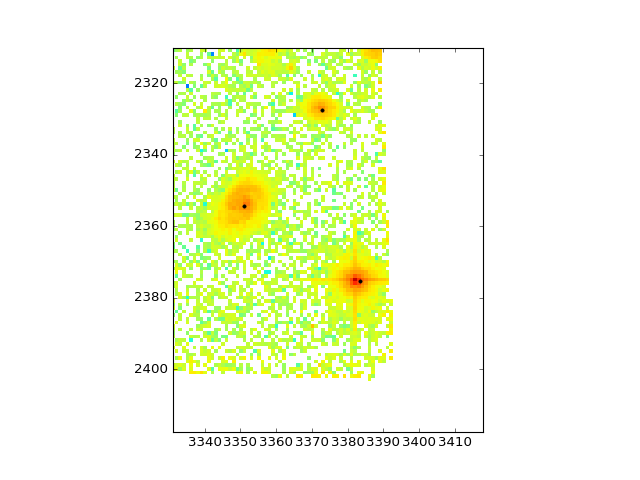

C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: divide by zero encountered in log10
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in log10


In [104]:
from astropy.wcs import WCS
w = WCS('data/GOODS-N_acsz_sci_sub.fits')
# x = w.all_world2pix(cat[:][[3,4]].T,1)
x = w.all_world2pix(cat[0][3],cat[0][4],1)
print(x)

def from_cat_to_img(ra, dec, w):
#     x_0 = data[0].header["CRPIX1"]
#     ra_0 = data[0].header["CRVAL1"]
#     dra_0 = data[0].header["CD1_1"]
#     y_0 = data[0].header["CRPIX2"]
#     dec_0 = data[0].header["CRVAL2"]
#     ddec_0 = data[0].header["CD2_2"]
#     ang0 = data[0].header["PA_APER"]/180.*np.pi
#     ang1 = data[0].header["ORIENTAT"]/180.*np.pi
#     ang = 0#ang0-ang1
#     x =  (ra - ra_0)/dra_0/2.
#     y =  (dec - dec_0)/ddec_0
#     x1 = x_0 + x*np.cos(ang)+y*np.sin(ang)
#     y1 = y_0 + -x*np.sin(ang)+y*np.cos(ang)
    x = np.zeros(len(ra))
    y = np.zeros(len(ra))
    for i in range(len(x)):
        temp = w.all_world2pix(ra[i],dec[i],1)
#         print(temp[0])
        x[i] = temp[0]#[0]
        y[i] = temp[1]#[0]
    return x, y

filt = cat[:,45]>10.
x,y = from_cat_to_img(cat[filt,3],cat[filt,4],w)
plt.figure(2)
plt.imshow(np.log10(data2[0].data[::5,::5]), interpolation='nearest')
plt.plot(x/5.,y/5., '.k')

[array(12683.163536471584), array(1568.450502390071)]


<IPython.core.display.Javascript object>


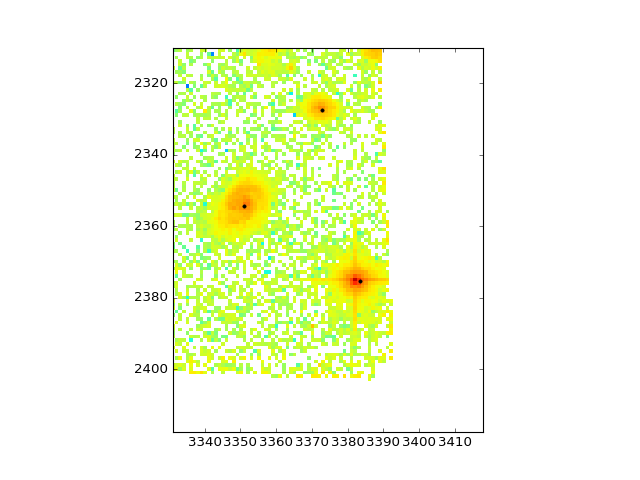

C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: divide by zero encountered in log10
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in log10


In [104]:
from astropy.wcs import WCS
w = WCS('data/GOODS-N_acsz_sci_sub.fits')
# x = w.all_world2pix(cat[:][[3,4]].T,1)
x = w.all_world2pix(cat[0][3],cat[0][4],1)
print(x)

def from_cat_to_img(ra, dec, w):
#     x_0 = data[0].header["CRPIX1"]
#     ra_0 = data[0].header["CRVAL1"]
#     dra_0 = data[0].header["CD1_1"]
#     y_0 = data[0].header["CRPIX2"]
#     dec_0 = data[0].header["CRVAL2"]
#     ddec_0 = data[0].header["CD2_2"]
#     ang0 = data[0].header["PA_APER"]/180.*np.pi
#     ang1 = data[0].header["ORIENTAT"]/180.*np.pi
#     ang = 0#ang0-ang1
#     x =  (ra - ra_0)/dra_0/2.
#     y =  (dec - dec_0)/ddec_0
#     x1 = x_0 + x*np.cos(ang)+y*np.sin(ang)
#     y1 = y_0 + -x*np.sin(ang)+y*np.cos(ang)
    x = np.zeros(len(ra))
    y = np.zeros(len(ra))
    for i in range(len(x)):
        temp = w.all_world2pix(ra[i],dec[i],1)
#         print(temp[0])
        x[i] = temp[0]#[0]
        y[i] = temp[1]#[0]
    return x, y

filt = cat[:,45]>10.
x,y = from_cat_to_img(cat[filt,3],cat[filt,4],w)
plt.figure(2)
plt.imshow(np.log10(data2[0].data[::5,::5]), interpolation='nearest')
plt.plot(x/5.,y/5., '.k')

In [12]:
data2[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                20480                                                  
NAXIS2  =                20480                                                  
ORIGIN  = 'SExtractor'         / FITS file originator                           
DATE    = '2013-04-14T07:25:04'                                                 
IRAF-TLM= '2013-04-14T07:13:59'                                                 
NEXTEND =                    6 / Number of standard extensions                  
FILENAME= 'h_nz_sect13_v2.0_drz_img.fits'    / name of file                     
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [98]:
from astropy.wcs import WCS
w = WCS('data/GOODS-N_acsz_sci_sub.fits')
# x = w.all_world2pix(cat[:][[3,4]].T,1)
x = w.all_world2pix(cat[0][3],cat[0][4],1)
print(x)

[array(12683.163536471584), array(1568.450502390071)]
